# UV_LED_GRID_FOR_PHOTOLITHOGRAPGHY

In [1]:
from multiprocessing import Pool
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
ddf_1=pd.read_pickle("./ddf_1.pkl")
ddf_2=pd.read_pickle("./ddf_2.pkl")
ddf_3=pd.read_pickle("./ddf_3.pkl")
df_temp=pd.merge(ddf_1,ddf_2)
df=pd.merge(df_temp,ddf_3)
# df.to_pickle("./df.pkl")

In [25]:
# del df["energy_max(mJ^cm^2)_3"]

In [26]:
df

,nleds,d(m),z(m),exposure_time(s)_1,percent_uniformity_1,exposure_time(s)_2,percent_uniformity_2,exposure_time(s)_3,percent_uniformity_3
0,9,0.01,0.010,1.609769,1.652103,1.316737,1.260447,2.066995,2.450514
1,9,0.01,0.011,1.713494,2.067137,1.402158,1.579463,2.198101,3.050847
2,9,0.01,0.012,1.815720,2.527452,1.492276,1.941891,2.312863,3.688060
3,9,0.01,0.013,1.919596,3.034999,1.588585,2.351023,2.418725,4.360924
4,9,0.01,0.014,2.026979,3.591311,1.691729,2.809479,2.521021,5.069618
...,...,...,...,...,...,...,...,...,...
378175,121,0.20,0.496,296.510814,99.973575,236.900544,99.948822,429.910720,99.975951
378176,121,0.20,0.497,296.679239,99.973504,237.071909,99.948803,430.096072,99.975929
378177,121,0.20,0.498,296.847999,99.973434,237.243565,99.948783,430.281699,99.975907
378178,121,0.20,0.499,297.017092,99.973363,237.415511,99.948762,430.467599,99.975885


In [62]:
((df["percent_uniformity_3"])>(df["percent_uniformity_1"])).value_counts()

True     311582
False     66598
dtype: int64

In [51]:
((df["exposure_time(s)_1"])>(df["exposure_time(s)_3"])).value_counts()

False    378178
True          2
dtype: int64

In [166]:
df_led=df[(df["nleds"]==49) & (df["d(m)"] <= 0.05)]
z_cons = 0.08
df_led_z= df_led[(df_led["z(m)"]==z_cons) | (np.isclose(df_led["z(m)"],z_cons ))]
z_range = len(df_led_z)

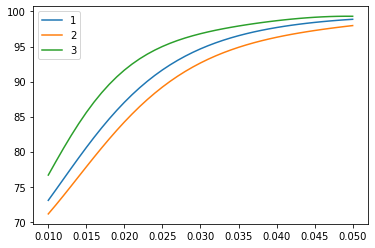

In [170]:
plt.plot(df_led_z["d(m)"],df_led_z["percent_uniformity_1"])
plt.plot(df_led_z["d(m)"],df_led_z["percent_uniformity_2"])
plt.plot(df_led_z["d(m)"],df_led_z["percent_uniformity_3"])
plt.legend(['1', '2','3']);

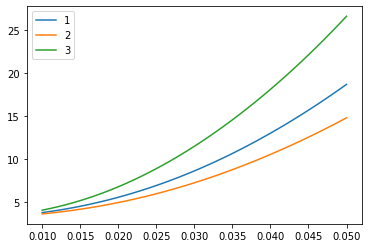

In [169]:
plt.plot(df_led_z["d(m)"],df_led_z["exposure_time(s)_1"])
plt.plot(df_led_z["d(m)"],df_led_z["exposure_time(s)_2"])
plt.plot(df_led_z["d(m)"],df_led_z["exposure_time(s)_3"])
plt.legend(['1', '2','3']);

In [155]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df_led_z

,nleds,d(m),z(m),exposure_time(s)_1,percent_uniformity_1,exposure_time(s)_2,percent_uniformity_2,exposure_time(s)_3,percent_uniformity_3
1052,49,0.010,0.08,3.769201,73.053865,3.615812,71.115112,4.049634,76.657136
3504,49,0.011,0.08,3.891928,74.564363,3.706496,72.399392,4.233539,78.589611
5951,49,0.012,0.08,4.026575,76.092823,3.806051,73.729526,4.436213,80.476743
8393,49,0.013,0.08,4.173252,77.618783,3.914574,75.089008,4.657994,82.287198
10830,49,0.014,0.08,4.332075,79.124158,4.032175,76.461819,4.899192,83.996908
13262,49,0.015,0.08,4.503169,80.593469,4.158970,77.832824,5.160073,85.589184
15689,49,0.016,0.08,4.686658,82.013926,4.295082,79.188117,5.440845,87.054241
18111,49,0.017,0.08,4.882666,83.375407,4.440633,80.515306,5.741660,88.388302
20528,49,0.018,0.08,5.091310,84.670328,4.595742,81.803714,6.062610,89.592472
22940,49,0.019,0.08,5.312700,85.893454,4.760519,83.044500,6.403733,90.671540


## Restrictions on LED grid size 